In [7]:
import pandas_datareader as pdr
import pandas as pd 
from datetime import datetime



In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [3]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
...,...,...,...,...,...,...
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978


<AxesSubplot:xlabel='Date'>

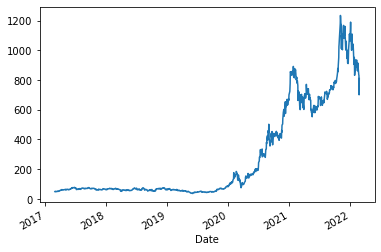

In [5]:
# simple moving average
df_tesla.Open.plot()

In [7]:
df_tesla['Open:10 days rolling'] =df_tesla.Open.rolling(window =10,min_periods=1).mean() 

<AxesSubplot:xlabel='Date'>

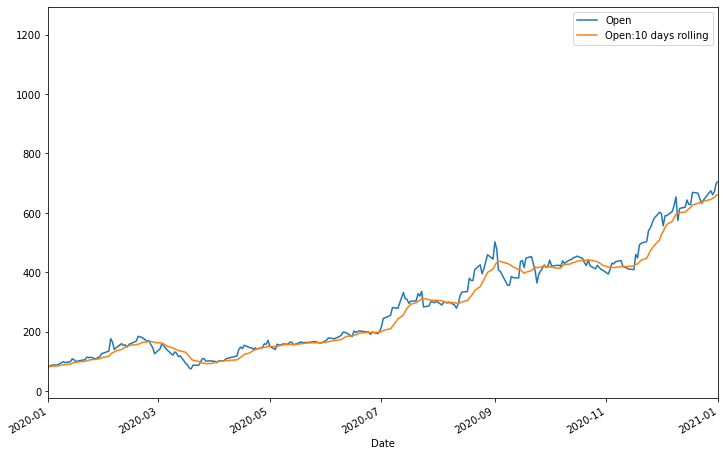

In [8]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,8))

<AxesSubplot:xlabel='Date'>

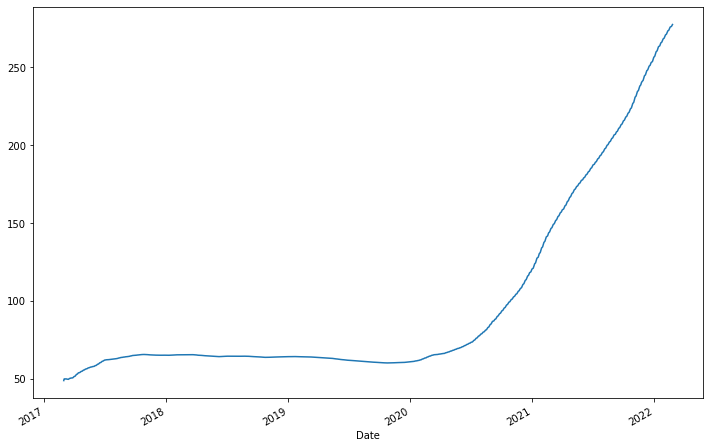

In [12]:
# this is the cumulation moving average.

df_tesla.Open.expanding().mean().plot(figsize=(12,8))


In [13]:
# EWMA :Exponential weighted moving avereage.
# Our current focur should be on the recent data 


In [14]:
 # now we will discuss the amazing part


In [ ]:
# https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sms 
import pandas as pd 

%matplotlib inline

In [3]:
df_airline = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv')

In [4]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [8]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [9]:
df_airline.dropna(axis=0,inplace=True)

In [10]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [12]:
df_airline['Month'] = pd.to_datetime(df_airline.Month)

In [13]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [14]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [15]:
df_airline.set_index('Month',inplace=True)

In [16]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

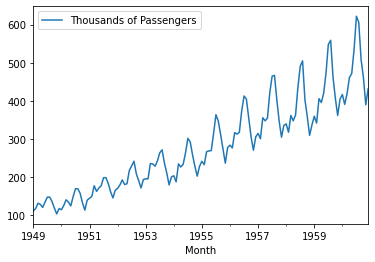

In [17]:
df_airline.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics : {}',format(result[0]))
    print('p-value :{}'.format(result[1]))
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis so reject the Null Hypothesis")
    else:
        print(" No Strong evidence about null hypothisis so Accept the Null Hypothesis")

In [20]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics : {} 0.8153688792060411
p-value :0.9918802434376409
 No Strong evidence about null hypothisis so Accept the Null Hypothesis


In [21]:
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers']- df_airline['Thousands of Passengers'].shift(1)

In [22]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [24]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics : {} -2.8292668241699945
p-value :0.05421329028382621
 No Strong evidence about null hypothisis so Accept the Null Hypothesis


In [25]:
df_airline['Passengers second Difference'] =df_airline['Passengers First Difference'] -df_airline['Passengers First Difference'].shift(1) 

In [26]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [27]:
adf_test(df_airline['Passengers second Difference'].dropna())

ADF Statistics : {} -16.384231542468466
p-value :2.732891850014397e-29
Strong evidence against the null hypothesis so reject the Null Hypothesis


In [28]:
# 12 months 
df_airline['Passengers 12 Difference'] =df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [30]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics : {} -3.3830207264924814
p-value :0.011551493085514952
Strong evidence against the null hypothesis so reject the Null Hypothesis


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

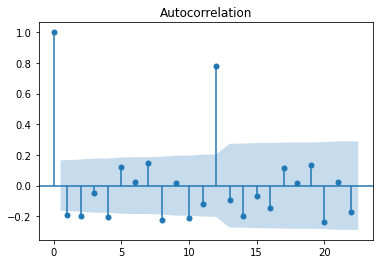

In [32]:
acf = plot_acf(df_airline["Passengers second Difference"].dropna())

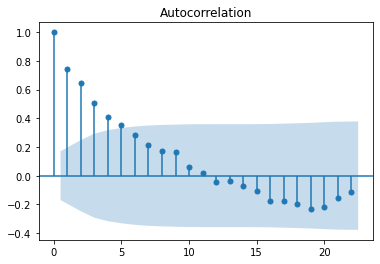

In [34]:
acf = plot_acf(df_airline["Passengers 12 Difference"].dropna())

E:\python\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


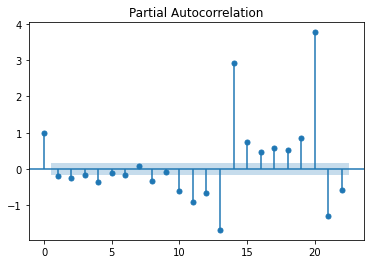

In [33]:
pacf = plot_pacf(df_airline["Passengers second Difference"].dropna())

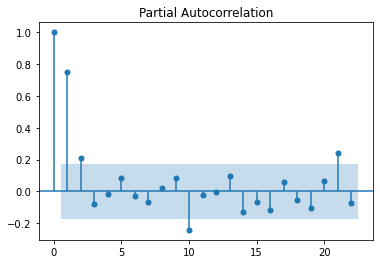

In [35]:
pacf = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [36]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)


In [38]:
train_data =df_airline[:train_dataset_end]
test_data =df_airline[train_dataset_end +timedelta(days=1):test_dataset_end]

In [39]:
pred_start_date  = test_data.index[0]
pred_end_date = test_data.index[-1]

In [40]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [41]:
from statsmodels.tsa.arima_model import ARIMA 

In [43]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [45]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [46]:
model_Arima_fit = model_ARIMA.fit()

E:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [47]:
model_Arima_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Mon, 28 Feb 2022   AIC                            738.477
Time:                                11:56:00   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [48]:
# predition
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [49]:
pred = model_Arima_fit.predict(start = pred_start_date,end = pred_end_date)
residual = test_data['Thousands of Passengers']-pred

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [51]:
residual

Month
1956-01-01    302.695948
1956-02-01    289.830813
1956-03-01    319.329700
1956-04-01    328.562171
1956-05-01    298.689315
1956-06-01    354.352099
1956-07-01    426.271407
1956-08-01    441.529623
1956-09-01    350.001355
1956-10-01    315.913197
1956-11-01    242.711533
1956-12-01    281.647793
1957-01-01    333.119950
1957-02-01    304.741482
1957-03-01    367.652404
1957-04-01    343.198148
1957-05-01    343.325760
1957-06-01    413.019336
1957-07-01    483.932040
1957-08-01    477.557338
1957-09-01    403.265266
1957-10-01    346.226381
1957-11-01    281.802376
1957-12-01    337.112057
1958-01-01    347.244789
1958-02-01    325.413870
1958-03-01    364.318101
1958-04-01    341.830106
1958-05-01    355.290684
1958-06-01    435.056441
1958-07-01    504.184577
1958-08-01    505.771357
1958-09-01    405.976038
1958-10-01    350.193250
1958-11-01    301.548557
1958-12-01    341.117840
1959-01-01    364.677793
1959-02-01    347.031484
1959-03-01    403.339732
1959-04-01    392.1

<AxesSubplot:ylabel='Density'>

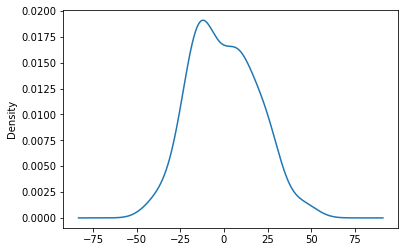

In [52]:
model_Arima_fit.resid.plot(kind = 'kde')

In [53]:
test_data['Predicted_ARIMA']=pred

C:\Users\Admin\AppData\Local\Temp/ipykernel_12208/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

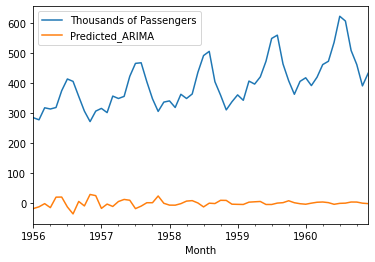

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoo

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoo

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoo

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\python\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoo

In [54]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()